# Datetime index (Datetime Library, Pandas, Numpy)

### Datetime Library

In [1]:
from datetime import datetime

In [2]:
# Creating different variables
my_year = 2017
my_month = 1
my_day = 2
my_hour = 13  #24 hour format
my_minute = 30
my_second = 15

In [3]:
# Creating date object (January 2nd, 2017)
my_date = datetime(my_year,my_month,my_day)

In [4]:
# Defaults to 0:00 (time)
my_date 

datetime.datetime(2017, 1, 2, 0, 0)

In [5]:
#Now creating date time object (# January 2nd, 2017 at 13:30:15)
my_date_time = datetime(my_year,my_month,my_day,my_hour,my_minute,my_second)

In [6]:
my_date_time

datetime.datetime(2017, 1, 2, 13, 30, 15)

In [7]:
my_date.day

2

In [8]:
my_date_time.hour

13

### Numpy Datetime Arrays and Ranges
The NumPy data type is called datetime64 to distinguish it from Python's datetime.

In [9]:
import numpy as np

In [10]:
# CREATE AN ARRAY FROM THREE DATES (datetime64[D]--datetime type[D] for the date precision)
np.array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64')

array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[D]')

In [11]:
#datetime64[Y] --- year precision (we can provide anything like h for hour etc.)
np.array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[Y]')

array(['2016', '2017', '2018'], dtype='datetime64[Y]')

In [12]:
# AN ARRAY OF DATES FROM 6/1/18 TO 6/22/18 SPACED ONE WEEK APART (start,stop,stepsize)
# 7 is the step size and it is of date as we have defined in datetime64[D]
np.arange('2018-06-01', '2018-06-23', 7, dtype='datetime64[D]')

array(['2018-06-01', '2018-06-08', '2018-06-15', '2018-06-22'],
      dtype='datetime64[D]')

In [13]:
# AN ARRAY OF DATES FOR EVERY YEAR FROM 1968 TO 1975 (omitting the step size and also precision here is year)
np.arange('1968', '1976', dtype='datetime64[Y]')

array(['1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975'],
      dtype='datetime64[Y]')

### Pandas Datetime 

In [14]:
import pandas as pd

In [15]:
# THE WEEK OF JULY 8TH, 2018 (month,date,year)
idx = pd.date_range('7/8/2018', periods=7, freq='D')
idx

DatetimeIndex(['2018-07-08', '2018-07-09', '2018-07-10', '2018-07-11',
               '2018-07-12', '2018-07-13', '2018-07-14'],
              dtype='datetime64[ns]', freq='D')

In [16]:
# Can also pass the string
idx = pd.date_range('Jan 01, 2018', periods=7, freq='D')
idx

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07'],
              dtype='datetime64[ns]', freq='D')

In [17]:
# Takes list and convert into datetime
idx = pd.to_datetime(['Jan 03, 2018','1/2/18','03-Jan-2018',None])
idx

DatetimeIndex(['2018-01-03', '2018-01-02', '2018-01-03', 'NaT'], dtype='datetime64[ns]', freq=None)

In [18]:
idx = pd.to_datetime(['2/1/2018'],format='%d/%m/%Y')
idx

DatetimeIndex(['2018-01-02'], dtype='datetime64[ns]', freq=None)

In [19]:
# Create some random data
data = np.random.randn(3,2)
cols = ['A','B']
print(data)

[[-2.00063663 -1.4799849 ]
 [ 0.19789584  1.02879585]
 [ 1.38228729 -2.58121491]]


In [20]:
# Create a NumPy datetime array
some_dates = np.array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[D]')
some_dates

array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[D]')

In [21]:
# Convert to an index
idx = pd.DatetimeIndex(some_dates)
idx

DatetimeIndex(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[ns]', freq=None)

In [22]:
# Create a DataFrame with our random data, our date index, and our columns
df = pd.DataFrame(data,idx,cols)
df

,A,B
2016-03-15,-2.000637,-1.479985
2017-05-24,0.197896,1.028796
2018-08-09,1.382287,-2.581215


In [23]:
df.index

DatetimeIndex(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[ns]', freq=None)

In [24]:
# Latest Date Value
df.index.max()

Timestamp('2018-08-09 00:00:00')

In [25]:
# Latest Date Index Location
df.index.argmax()

2

In [26]:
# Earliest Date Value
df.index.min()

Timestamp('2016-03-15 00:00:00')

In [27]:
# Earliest Date Index Location
df.index.argmin()

0

# Time Resampling

In [28]:
#index_col for the index of dataframe and parse_dates=True means that these are dates not strings
df = pd.read_csv('Data/starbucks.csv', index_col='Date', parse_dates=True)

In [29]:
# Date, closing price of starbucks share, volume of shares traded
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [30]:
df.index


#if index is not in datetime format, use pd.to_datetime(df.index)

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

When calling .resample() you first need to pass in a rule parameter, then you need to call some sort of aggregation function.

The rule parameter describes the frequency with which to apply the aggregation function (daily, monthly, yearly, etc.)
The aggregation function is needed because, due to resampling, we need some sort of mathematical rule to join the rows (mean, sum, count, etc.)

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

In [31]:
# Yearly Means
#Resampling rule 'A' takes all of the data points in a given year, applies the aggregation function (in this case we calculate the mean), 
#and reports the result as the last day of that year.
df.resample(rule='A').mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


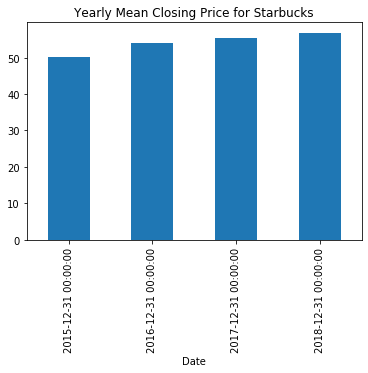

In [32]:
df['Close'].resample('A').mean().plot.bar(title='Yearly Mean Closing Price for Starbucks');

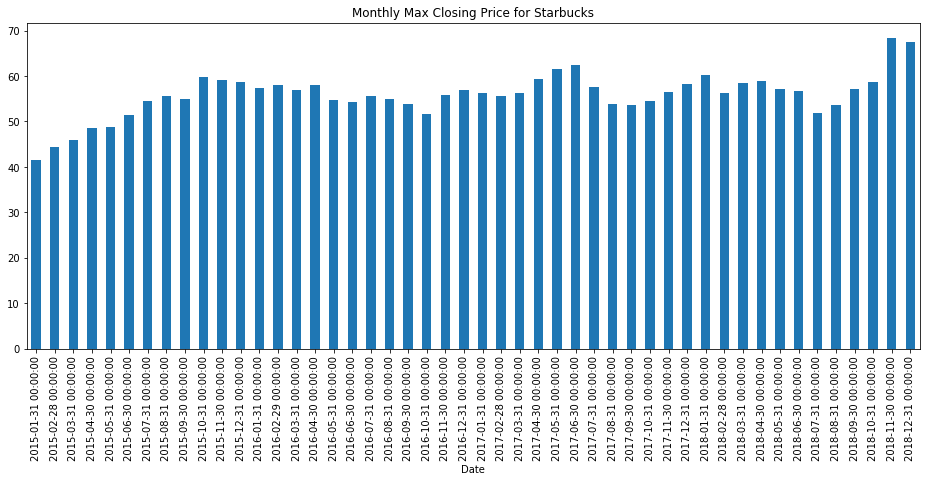

In [33]:
title = 'Monthly Max Closing Price for Starbucks'
df['Close'].resample('M').max().plot.bar(figsize=(16,6), title=title,color='#1f77b4');

# Time Shifting  

**.shift()**

This method shifts the entire date index a given number of rows, without regard for time periods (months & years).

(positive number for forward shift and negative number for backward shift)

It returns a modified copy of the original DataFrame.


In [34]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [35]:
df.shift(1).head()
#We can even fill the value using fill value parameter

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0


In [36]:
# NOTE: You will lose that last piece of data that no longer has an index!
df.shift(1).tail()

,Close,Volume
Date,,
2018-12-24,61.39,23524888.0
2018-12-26,60.56,6323252.0
2018-12-27,63.08,16646238.0
2018-12-28,63.20,11308081.0
2018-12-31,63.39,7712127.0


In [37]:
df.shift(-1).head()

,Close,Volume
Date,,
2015-01-02,37.2781,11623796.0
2015-01-05,36.9748,7664340.0
2015-01-06,37.8848,9732554.0
2015-01-07,38.4961,13170548.0
2015-01-08,37.2361,27556706.0


In [38]:
df.shift(-1).tail()

,Close,Volume
Date,,
2018-12-24,63.08,16646238.0
2018-12-26,63.20,11308081.0
2018-12-27,63.39,7712127.0
2018-12-28,64.40,7690183.0
2018-12-31,NaN,NaN


In [39]:
# Shift everything forward one month (time frequency code)
# M for the month end
df.shift(periods=1, freq='M').head()

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548


# Rolling and Expanding

A common process with time series is to create data based off of a rolling mean. The idea is to divide the data into "windows" of time, and then calculate an aggregate function for each window. In this way we obtain a simple moving average.

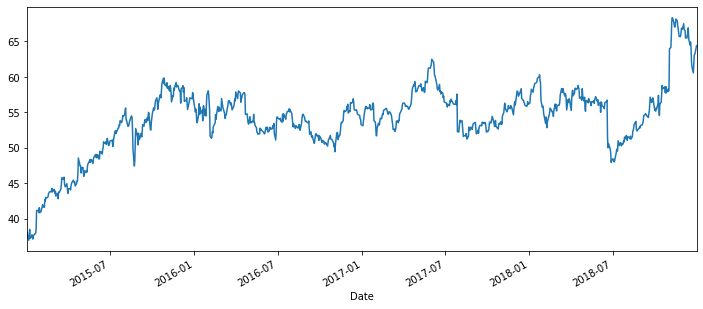

In [40]:
df['Close'].plot(figsize=(12,5)).autoscale(axis='x',tight=True);

In [41]:
# 7 day rolling mean
df.rolling(window=7).mean().head(15)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
2015-01-09,NaN,NaN
2015-01-12,37.616786,1.238222e+07
2015-01-13,37.578786,1.297288e+07
2015-01-14,37.614786,1.264020e+07


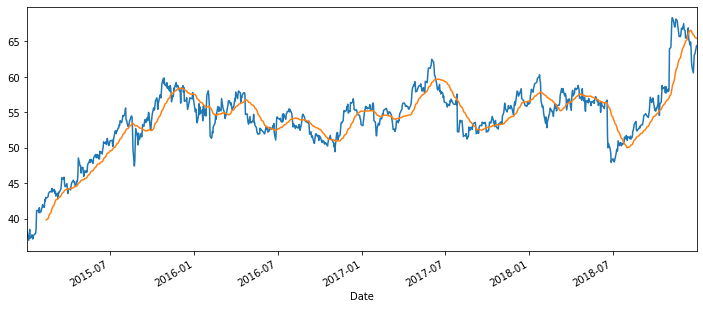

In [42]:
#Plotting the two graphs
df['Close'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)
df.rolling(window=30).mean()['Close'].plot();

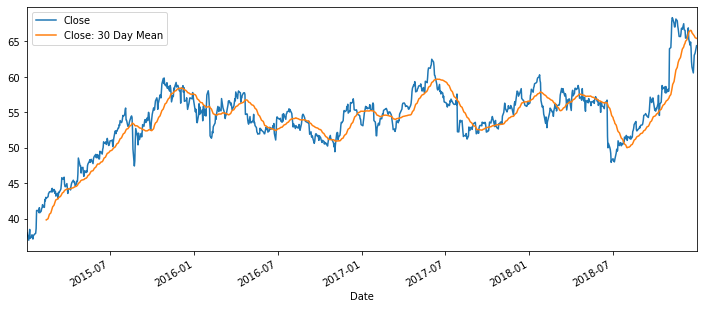

In [43]:
# Adding Legend(The easiest way to add a legend is to make the rolling value a new column, then pandas does it automatically)
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()
df[['Close','Close: 30 Day Mean']].plot(figsize=(12,5)).autoscale(axis='x',tight=True);

 # Visualising Time series data 

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

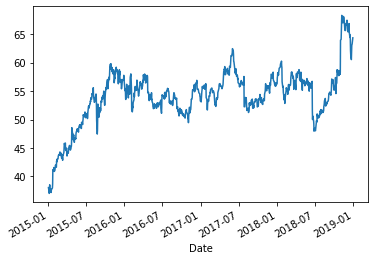

In [45]:
df['Close'].plot(); 
# ; removes the matplotlib notification

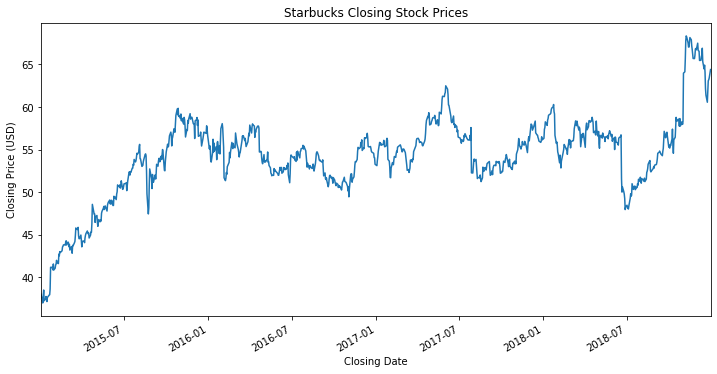

In [46]:
title='Starbucks Closing Stock Prices'
ylabel='Closing Price (USD)'
xlabel='Closing Date'

ax = df['Close'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)  #fixes whitespace value for x axis. no space left starting and endng of the x axis
ax.set(xlabel=xlabel, ylabel=ylabel);

**Getting the data for the specific month**

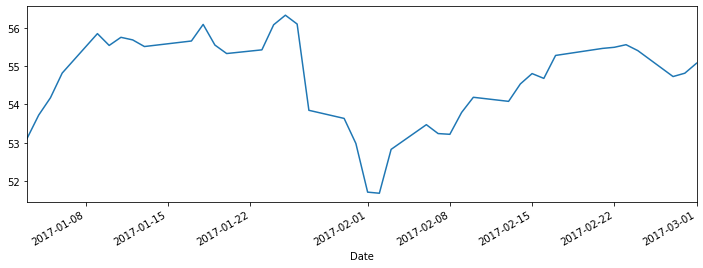

In [47]:
# Dates are separated by a colon:
df['Close']['2017-01-01':'2017-03-01'].plot(figsize=(12,4)).autoscale(axis='x',tight=True);

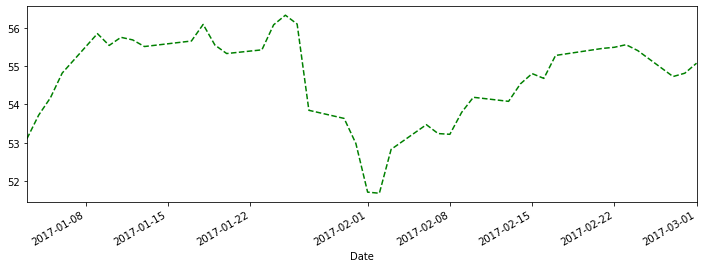

In [49]:
# Dates are separated by a colon: (with ls and color parameter)
df['Close']['2017-01-01':'2017-03-01'].plot(figsize=(12,4),ls='--',color='green').autoscale(axis='x',tight=True);

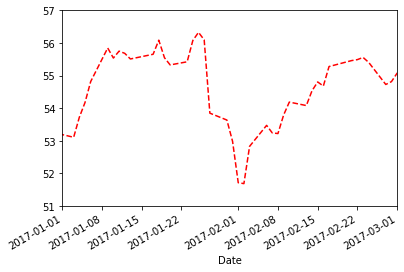

In [50]:
#Another method for getting data of month
df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[51,57],ls='--',c='r');
#xlim states the limit i.e. from starting to ending (for x axis)
#ylim is the limit of the y axis

In [51]:
from matplotlib import dates

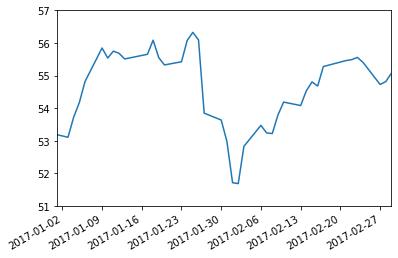

In [52]:
##Set the spacing

# CREATE OUR AXIS OBJECT
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[51,57])

# REMOVE PANDAS DEFAULT "Date" LABEL
ax.set(xlabel='')

# SET THE TICK LOCATOR AND FORMATTER FOR THE MAJOR AXIS
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))

#This means that we will not plot graph according to first day of month. here the weekday is 0

### Date Formatting
Formatting follows the Python datetime <strong><a href='http://strftime.org/'>strftime</a></strong> codes.<br>
The following examples are based on <tt>datetime.datetime(2001, 2, 3, 16, 5, 6)</tt>:
<br><br>

<table style="display: inline-block">  
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%Y</td><td>Year with century as a decimal number.</td><td>2001</td></tr>
<tr><td>%y</td><td>Year without century as a zero-padded decimal number.</td><td>01</td></tr>
<tr><td>%m</td><td>Month as a zero-padded decimal number.</td><td>02</td></tr>
<tr><td>%B</td><td>Month as locale’s full name.</td><td>February</td></tr>
<tr><td>%b</td><td>Month as locale’s abbreviated name.</td><td>Feb</td></tr>
<tr><td>%d</td><td>Day of the month as a zero-padded decimal number.</td><td>03</td></tr>  
<tr><td>%A</td><td>Weekday as locale’s full name.</td><td>Saturday</td></tr>
<tr><td>%a</td><td>Weekday as locale’s abbreviated name.</td><td>Sat</td></tr>
<tr><td>%H</td><td>Hour (24-hour clock) as a zero-padded decimal number.</td><td>16</td></tr>
<tr><td>%I</td><td>Hour (12-hour clock) as a zero-padded decimal number.</td><td>04</td></tr>
<tr><td>%p</td><td>Locale’s equivalent of either AM or PM.</td><td>PM</td></tr>
<tr><td>%M</td><td>Minute as a zero-padded decimal number.</td><td>05</td></tr>
<tr><td>%S</td><td>Second as a zero-padded decimal number.</td><td>06</td></tr>
</table>
<table style="display: inline-block">
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%#m</td><td>Month as a decimal number. (Windows)</td><td>2</td></tr>
<tr><td>%-m</td><td>Month as a decimal number. (Mac/Linux)</td><td>2</td></tr>
<tr><td>%#x</td><td>Long date</td><td>Saturday, February 03, 2001</td></tr>
<tr><td>%#c</td><td>Long date and time</td><td>Saturday, February 03, 2001 16:05:06</td></tr>
</table>  
    

In [54]:
# USE THIS SPACE TO EXPERIMENT WITH DIFFERENT FORMATS (formats above)
from datetime import datetime
datetime(2001, 2, 3, 16, 5, 6).strftime("%A, %B %d, %Y  %I:%M:%S %p")

'Saturday, February 03, 2001  04:05:06 PM'

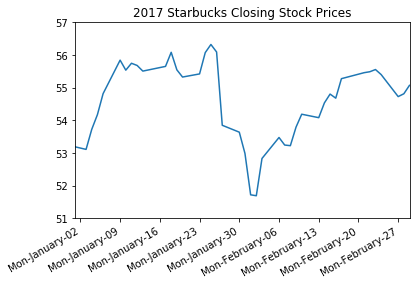

In [55]:
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[51,57],title='2017 Starbucks Closing Stock Prices')
ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))

#date formatter for the graph(%a,%B,%d)
ax.xaxis.set_major_formatter(dates.DateFormatter("%a-%B-%d"))

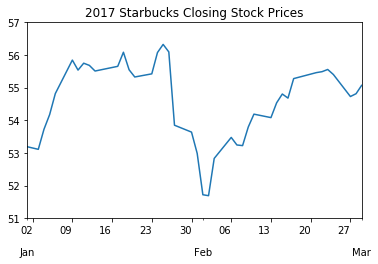

In [56]:
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[51,57],rot=0,title='2017 Starbucks Closing Stock Prices')
ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

#Sets another locator below majot locator (\n\n new line)
ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

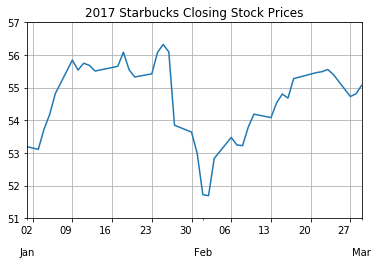

In [57]:
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[51,57],rot=0,title='2017 Starbucks Closing Stock Prices')
ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

#setting the grid
ax.yaxis.grid(True)
ax.xaxis.grid(True)